# Thiago Schuck December 13 2023
### This is the final project of CMP262
### This file will clean the dataset created by the Create Dataset to answer these questions
1. What product has the most reviews?
2. What product is the most well reviewed? (review rating / number of reviews)
3. Which products are the most/least expensive?
4. Are there any products that are sold out?
5. Which products are on sale? And by how much?

In [7]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Methods

### Method to explore dataset
### Method to clean dataset
### Method to answer questions
### Main method

In [8]:
def exploratoryAnalysis(best_sellers):

    # describe()
    print(best_sellers.describe())

    # column
    print(best_sellers.columns)

    # shape
    print(best_sellers.shape)

    # dtypes
    print(best_sellers.dtypes)

    # head(), tail(), sample()
    display(best_sellers.head())
    display(best_sellers.tail())
    display(best_sellers.sample(int(len(best_sellers)/2)))

    # info()
    print(best_sellers.info())


In [9]:
def clean(best_sellers):

    # Remove '$' from Price and Original Price
    best_sellers['Price'] = best_sellers['Price'].str.replace('$', '')
    best_sellers['Original Price'] = best_sellers['Original Price'].str.replace('$', '')

    # Change data in columns to proper data types
    best_sellers['Name'] = best_sellers['Name'].astype(str)
    best_sellers['Price'] = best_sellers['Price'].astype(float)
    best_sellers['Original Price'] = best_sellers['Original Price'].astype(float)
    best_sellers['Rating'] = best_sellers['Rating'].astype(float)
    best_sellers['Reviews'] = best_sellers['Reviews'].astype(int)

    # Return cleaned dataframe
    return best_sellers

In [10]:
def answer_questions(best_sellers):

    # Create string to store answers
    answers = ""

    ## Question 1

    # Create variables to store product with most reviews and number of reviews for average
    mostReviewed = ""
    reviews = 0
    totalReviews = 0

    # Loop through dataset to find product with most reviews
    for i, row in best_sellers.iterrows():

        # Add to total reviews for average
        totalReviews += row["Reviews"]

        if row["Reviews"] > reviews:
            reviews = row["Reviews"]
            mostReviewed = row["Name"]

    # Calculate average reviews
    averageReviews = round(totalReviews / len(best_sellers))

    # Add answer to string
    answers += "The product with the most reviews is " + mostReviewed + " with " + str(reviews) + " reviews.\n"
    answers += "\n"

    # Create chart
    reviewChart = plt.bar(["Most Reviewed", "Average Reviews"], [reviews, averageReviews], color = "blue", label = "Average Reviews", width = 0.5)
    reviewChart = plt.title("Most reviewed product vs average reviews")
    reviewChart = plt.ylabel("Number of Reviews")
    reviewChart = plt.show()

    ## Question 2

    # Create review rate variable and most well reviewed product
    reviewRate = 0          # Stars per review
    highestReviewed = ""

    # Loop through dataset to find product with highest review rate
    for i, row in best_sellers.iterrows():

        rate = row["Rating"] / row["Reviews"] if row["Reviews"] != 0 else 0

        if rate > reviewRate:

            reviewRate = rate
            highestReviewed = row["Name"]

    # Add answer to string
    answers += "The product that is the most well reviewed is " + highestReviewed + " with " + str(round(reviewRate, 3)) + " stars per review.\n"
    answers += "\n"

    ## Question 3

    # Create most and least expensive dictionaries
    mostExpensive = ""
    leastExpensive = ""
    mostExpensivePrice = 0
    leastExpensivePrice = 0

    # Loop through dataset to find most and least expensive products
    for i, row in best_sellers.iterrows():

        if row["Price"] > mostExpensivePrice:

            mostExpensivePrice = row["Price"]
            mostExpensive = row["Name"]

        if row["Price"] < leastExpensivePrice or leastExpensivePrice == 0:

            leastExpensivePrice = row["Price"]
            leastExpensive = row["Name"]

    # Add answer to string
    answers += "The most expensive product is " + mostExpensive + " at $" + str(mostExpensivePrice) + ".\n"
    answers += "The least expensive product is " + leastExpensive + " at $" + str(leastExpensivePrice) + ".\n"
    answers += "\n"

    ## Question 4

    # Create dictionary of sold out products and their ratnigs
    soldOut = {}

    # Loop through dataset to find sold out products
    for i, row in best_sellers.iterrows():

        if row["Availability"] == "Out of Stock":

            soldOut[row["Name"]] = row["Rating"]

    # Add answer to string
    if len(soldOut) == 0:

        answers += "There are no sold out products.\n"

    else:

        answers += "The sold out products are:\n"

        index = 1
        for product, values in soldOut.items():
            
            answers += str(index) + ". " + product + "\n"
            index += 1

    answers += "\n"

    # Create chart
    numSoldOut = []
    for i in range(len(soldOut)):
        numSoldOut.append(i+1)

    soldOutChart = plt.bar(numSoldOut, soldOut.values(), color = "blue", label = "Sold Out Products", width = 0.5)
    for i, value in enumerate(soldOut.values()):
        soldOutChart = plt.text(i+1, value, str(value), ha='center', va='bottom')
    soldOutChart = plt.title("Sold Out Products and their Ratings")
    soldOutChart = plt.xlabel("Sold Out Products")
    soldOutChart = plt.ylabel("Rating")
    soldOutChart = plt.show()

    ## Question 5

    # Create dictionary of products that are on sale
    onSale = {}

    # Loop through dataset to find products that are on sale
    for i, row in best_sellers.iterrows():

        price = row["Price"]
        originalPrice = row["Original Price"]

        if price != originalPrice:

            discount = 100 * (originalPrice - price) / originalPrice
            onSale[row["Name"]] = discount

    # Add answer to string
    if len(onSale) == 0:

        answers += "There are no products on sale.\n"
    
    else:

        answers += "The products on sale are:\n"

        for product in onSale:

            answers += product + " at %" + str(round(onSale[product], 2)) + " off\n"
    answers += "\n"

    # Return answers
    return answers

In [11]:
def main():
    
    # Read in the data
    best_sellers = pd.read_csv(r'C:\Users\Thiag\Documents\Python Scripts\CMP262\CMP262 Work\HW\Final Project\Dataset\Walmart_best_sellers.csv')

    # Call method to do exploratory analysis
    #exploratoryAnalysis(best_sellers)

    # Call method to clean data
    best_sellers = clean(best_sellers)

    # Call method to get answers
    answers = answer_questions(best_sellers)

    # Print answers
    print(answers)

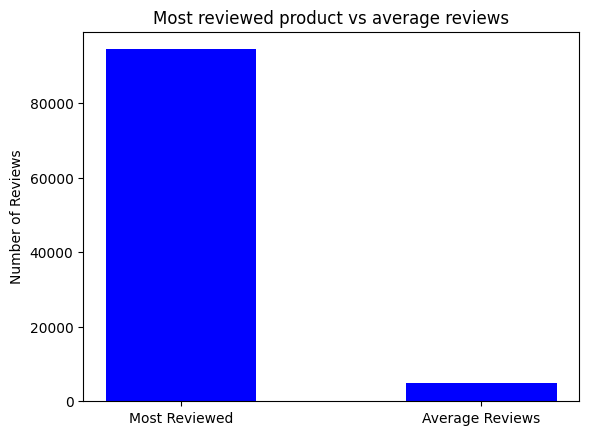

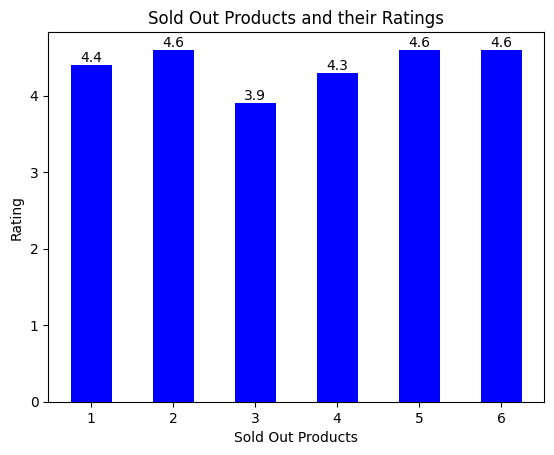

The product with the most reviews is Wrangler Men's and Big Men's Relaxed Fit Jeans with Flex with 94410 reviews.

The product that is the most well reviewed is Midas 8x42 UHD Binocular with 0.148 stars per review.

The most expensive product is 1 oz Gold Bar - APMEX (TEP) at $2054.29.
The least expensive product is Parent's Choice Fragrance Free Baby Wipes, Travel-Pack, 50 Count (Select for More Options) at $0.98.

The sold out products are:
1. Disney Minnie Mouse Convertible Car 6 Volts Electric Ride-on, for Children Ages 3+ years, by Huffy
2. Ozark Trail Camping Utility Wagon with Tailgate & Extension Handle, Red
3. Coleman 71" x 26" Bahamas AirJet Spa Outdoor 177 gal. Inflatable Hot Tub, Max Temperature of 104˚F
4. onn. 65 Class 4K UHD (2160P) LED Roku Smart TV HDR (100012587)
5. VEATOOL Bluetooth Headphones True Wireless Earbuds 60H Playback LED Power Display Earphones with Wireless Charging Case IPX7 Waterproof in-Ear Earbuds with Mic for TV Smart Phone Computer Laptop
6. Coach F

In [12]:
if __name__ == "__main__":
    main()